In [1]:
import pandas as pd
import numpy as np

In [2]:
corona = pd.read_csv('../csv/corona.csv')

In [3]:
corona.drop(['Unnamed: 0'], axis = 'columns', inplace = True)

In [4]:
corona.columns = ['등록일시', '사망자', '확진자', '게시글번호', '기준일', '기준시간', '수정일시', '누적의심자', '누적확진률']

In [5]:
corona.reset_index(drop = True, inplace = True)

In [6]:
corona = corona.sort_values('등록일시')

In [7]:
corona['일일확진자'] = corona['확진자'].diff()
corona['일일사망자'] = corona['사망자'].diff()

corona.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
819,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,NaN,NaN
818,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0
817,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0
816,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0
815,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0


In [8]:
corona = corona.reset_index(drop = True)

corona.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,NaN,NaN
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0


In [9]:
# 결측치를 채우는 함수
# fillna(결측치에 들어갈 값)

corona['일일확진자'] = corona['일일확진자'].fillna(0)
corona['일일사망자'] = corona['일일사망자'].fillna(0)

corona.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0


In [10]:
# fillna(옵션)
# method 속성 → ffill, bfill
# fill '채우다'라는 의미, f: front / b: back
# ffill → 전의 값으로 채운다
# bfill → 후의 값으로 채운다
# 누적의심자 컬럼의 값들을 fillna(method = 'bfill')

corona["누적의심자"].fillna(method = 'bfill')

0      210144.0
1      222395.0
2      234998.0
3      248647.0
4      261335.0
         ...   
815         NaN
816         NaN
817         NaN
818         NaN
819         NaN
Name: 누적의심자, Length: 820, dtype: float64

In [11]:
corona["누적의심자"].fillna(method = 'ffill')

0        210144.0
1        222395.0
2        234998.0
3        248647.0
4        261335.0
          ...    
815    21518073.0
816    21518073.0
817    21518073.0
818    21518073.0
819    21518073.0
Name: 누적의심자, Length: 820, dtype: float64

In [12]:
# 결측치 확인

corona.isna().sum()

등록일시       0
사망자        0
확진자        0
게시글번호      0
기준일        0
기준시간       0
수정일시       3
누적의심자    128
누적확진률    197
일일확진자      0
일일사망자      0
dtype: int64

In [13]:
# 누적확진률에 결측치의 값을 누적확진률의 평균으로 채운다.

corona['누적확진률'] = corona['누적확진률'].fillna(corona['누적확진률'].mean())

corona['누적확진률']

0      3.919308
1      3.804175
2      3.621744
3      3.458499
4      3.318000
         ...   
815    1.556435
816    1.556435
817    1.556435
818    1.556435
819    1.556435
Name: 누적확진률, Length: 820, dtype: float64

In [14]:
# filter 기능
# query() - 괄호 안에 조건에 맞는 인덱스를 출력

corona.query('일일확진자 < 0')

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-430.0,-2.0


In [15]:
# 인덱스 444 ~ 448까지의 데이터를 출력

corona.loc[444 : 448]

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
444,2021-05-29 00:00:00.000,1951,139427,496,20210529,00:00,2021-10-07 10:30:51.51,9733588.0,1.450884,533.0,5.0
445,2021-05-30 00:00:00.0,1959,140337,498,20210531,00:00,2021-10-14 13:48:56.821,9761156.0,1.456805,910.0,8.0
446,2021-05-30 00:00:00.000,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-430.0,-2.0
447,2021-06-01 00:00:00.000,1963,140796,499,20210601,00:00,2021-10-07 10:30:51.51,9798400.0,1.455890,889.0,6.0
448,2021-06-02 00:00:00.000,1965,141473,500,20210602,00:00,2021-10-07 10:30:51.51,9834348.0,1.457668,677.0,2.0


In [16]:
# lambda 함수 파생변수
# 일반 def 함수 파생변수
# 누적확진률 칼럼에서 누적확진률의 평균보다 높으면 High, 낮으면 Low

corona['누적확진률'].fillna(corona['누적확진률'].mean(), inplace = True)

In [17]:
# lambda 매개변수: 표현식

corona['H/L'] = corona['누적확진률'].apply(
    lambda x : 'High' if (x > corona['누적확진률'].mean()) else 'Low'
                )

corona['누적확진률']

0      3.919308
1      3.804175
2      3.621744
3      3.458499
4      3.318000
         ...   
815    1.556435
816    1.556435
817    1.556435
818    1.556435
819    1.556435
Name: 누적확진률, Length: 820, dtype: float64

In [18]:
# apply() 일반 함수
# 함수 생성
# 매개변수 1개
# 매개변수의 값이 누적확진률의 평균보다 높으면 'High' 리턴
# 조건식이 거짓이면 'Low' 리턴

def HL(x) :

    if x > corona['누적확진률'].mean() :
        return 'High'

    else :
        return 'Low'

corona['누적확진률'].apply(HL)              # apply()에서는 함수의 값을 넣을 필요 없다

0      High
1      High
2      High
3      High
4      High
       ... 
815    High
816    High
817    High
818    High
819    High
Name: 누적확진률, Length: 820, dtype: object

In [19]:
# '요일'이라는 파생변수 생성
# 등록일시 datetime 변경
# datetime 기준으로 요일을 출력

corona['등록일시'] = pd.to_datetime(corona['등록일시'])         # format을 꼭 사용하지 않아도 됨

In [20]:
# dt.weekday를 사용하면 
# 0 = 월요일, ... , 6 = 일요일

corona['요일'] = corona['등록일시'].dt.weekday

corona.head()

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L,요일
0,2020-03-10,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,0.0,High,1
1,2020-03-11,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High,2
2,2020-03-12,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0,High,3
3,2020-03-13,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0,High,4
4,2020-03-14,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0,High,5


In [21]:
# apply 함수를 이용해서 숫자로 표시 되어있는 요일 칼럼을 한글로 변경

def change_week(x) :

    if x == 0 :
        return '월'

    elif x == 1 :
        return '화'

    elif x == 2 :
        return '수'

    elif x == 3 :
        return '목'

    elif x == 4 :
        return '금'

    elif x == 5 :
        return '토'

    else :
        return '일'

corona['요일'] = corona['요일'].apply(change_week)

In [22]:
# corona['요일'].apply(lambda x : '월' if x == 0 else '화' if x == 1 else '수')

In [23]:
# 요일별 코로나 확진자 수의 평균이 어떻게 표시 되는지 그래프를 이용해서 출력

week_corona = corona.groupby('요일').mean()

week_corona['일일확진자']

요일
금    22542.854701
목    25776.267241
수    26994.550847
월    14862.586207
일    20625.101695
토    22555.948718
화    21787.296610
Name: 일일확진자, dtype: float64

In [24]:
from matplotlib import font_manager, rc

In [25]:
import matplotlib.pyplot as plt

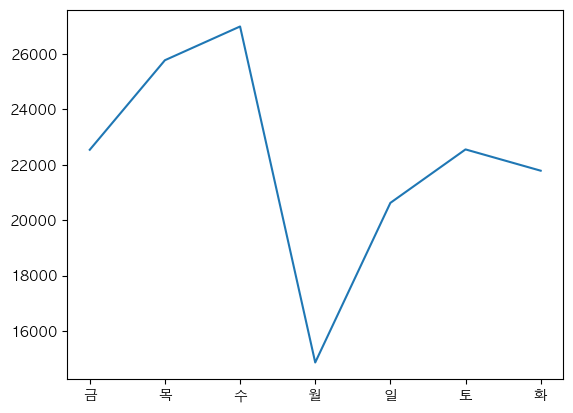

In [26]:
# x축의 값은 '요일'
# y축의 값은 '평균 확진자의 수'

x = week_corona.index
y = week_corona['일일확진자']

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

plt.plot(x, y)